In [1]:
# =========================
# 0. 라이브러리 임포트 및 환경 설정
# =========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Jupyter Notebook 안에서 그래프가 바로 보이도록 설정
%matplotlib inline

# 그래프 스타일 설정 (가독성을 위해)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)

# 현재 경로 확인 (제대로 /data/ephemeral/home/EDA 인지 체크)
print(f"Current Working Directory: {os.getcwd()}")


Current Working Directory: /data/ephemeral/home/EDA


In [2]:
# =========================
# 1. 데이터 로드
# =========================
# 분석할 모델 CSV 파일 리스트
# (파일 이름이 정확해야 합니다. 업로드해주신 파일명 기준입니다.)
# 'effb3_deeplab3+_9733.csv',
#     'EfficientNet-b3_unet++_9736.csv',
#     'sam2_unet_9731.csv',
#     'segfomer_9683.csv',
#     'swin_upernet_9728.csv',
#     'upernet_swinL_9732.csv',
#     'resnet101_UNET++_9702.csv'
    # 'hardvoting_9754.csv',
    
    # 'EfficientNet-B3_DeepLabv3+_9733.csv',
    # 'EfficientNet-B3_DeepLabv3+_pseudo_9744.csv',
    # 'EfficientNet-B3_UNet++_9736.csv',
    # 'EfficientNet-B3_UNet++_pseudo_9749.csv',
    # 'EfficientNet-B4_UNet++_9590.csv',
    # 'HRNet_UNet_9415.csv',
    # 'ResNet-101_UNet++_9702.csv',
    # 'SAM2_UNet_9731.csv',
    # 'SegFomer_9683.csv',
    # 'SwinB_UPerNet_9728.csv',
    # 'SwinB_UPerNet_9730.csv',
    # 'SwinB_UPerNet_pseudo_9753.csv',
    # 'SwinL_UPerNet_9732.csv'
    
    # 'hardvoting_9754.csv',
    # 'SwinB_UPerNet_pseudo_9753.csv',
files = [
    # 'swin_upernet_9753.csv',
    # '9736_pseudo_9749.csv',
    # 'effb3+deeplabv3+_pseudo_9744.csv',
    'EfficientNet-B3_DeepLabv3+_9733.csv',
    'EfficientNet-B3_DeepLabv3+_pseudo_9744.csv',
    'EfficientNet-B3_UNet++_9736.csv',
    'EfficientNet-B3_UNet++_pseudo_9749.csv',
    'EfficientNet-B4_UNet++_9590.csv',
    'HRNet_UNet_9415.csv',
    'ResNet-101_UNet++_9702.csv',
    'SAM2_UNet_9731.csv',
    'SegFomer_9683.csv',
    'SwinB_UPerNet_9728.csv',
    'SwinB_UPerNet_9730.csv',
    'SwinB_UPerNet_pseudo_9753.csv',
    'SwinL_UPerNet_9732.csv'
]

dataframes = {}

print(">>> 데이터 로딩 시작...")
for f in files:
    # 같은 폴더에 있으므로 경로 없이 파일명만 사용
    file_path = f 
    
    if os.path.exists(file_path):
        dataframes[f] = pd.read_csv(file_path)
        print(f"[OK] Loaded: {f} ({len(dataframes[f])} rows)")
    else:
        print(f"[ERROR] 파일을 찾을 수 없습니다: {file_path}")
        print("      -> 파일이 /data/ephemeral/home/EDA/ 경로에 있는지 확인해주세요.")

# 첫 번째 데이터프레임으로 기본 정보 확인
if len(dataframes) > 0:
    first_key = list(dataframes.keys())[0]
    print(f"\nExample Head ({first_key}):")
    display(dataframes[first_key].head(3))

>>> 데이터 로딩 시작...
[OK] Loaded: EfficientNet-B3_DeepLabv3+_9733.csv (8352 rows)
[OK] Loaded: EfficientNet-B3_DeepLabv3+_pseudo_9744.csv (8352 rows)
[OK] Loaded: EfficientNet-B3_UNet++_9736.csv (8352 rows)


[OK] Loaded: EfficientNet-B3_UNet++_pseudo_9749.csv (8352 rows)
[OK] Loaded: EfficientNet-B4_UNet++_9590.csv (8352 rows)
[OK] Loaded: HRNet_UNet_9415.csv (8352 rows)
[OK] Loaded: ResNet-101_UNet++_9702.csv (8352 rows)
[OK] Loaded: SAM2_UNet_9731.csv (8352 rows)
[OK] Loaded: SegFomer_9683.csv (8352 rows)
[OK] Loaded: SwinB_UPerNet_9728.csv (8352 rows)
[OK] Loaded: SwinB_UPerNet_9730.csv (8352 rows)
[OK] Loaded: SwinB_UPerNet_pseudo_9753.csv (8352 rows)
[OK] Loaded: SwinL_UPerNet_9732.csv (8352 rows)

Example Head (EfficientNet-B3_DeepLabv3+_9733.csv):


,image_name,class,rle
0,image1661319116107.png,finger-1,1814991 9 1817037 16 1819084 21 1821131 25 182...
1,image1661319116107.png,finger-2,2075188 5 2077233 18 2079277 24 2081322 29 208...
2,image1661319116107.png,finger-3,2536086 12 2538132 15 2540177 18 2542224 20 25...


In [3]:
# =========================
# 2. 전처리(RLE를 면적(Area)으로 변환)
# =========================
def get_area_from_rle(rle):
    """
    RLE(Run-Length Encoding) 문자열을 입력받아 마스크의 총 픽셀 수(면적)를 반환합니다.
    RLE 형식: '시작픽셀 길이 시작픽셀 길이 ...' (공백 구분)
    """
    if pd.isna(rle): 
        return 0
    
    # 공백으로 분리하여 정수 리스트로 변환
    parts = list(map(int, rle.split()))
    
    # 짝수 인덱스(0, 2, 4...)는 시작 위치, 홀수 인덱스(1, 3, 5...)는 길이(Length)
    # 길이들의 합이 곧 면적입니다.
    return sum(parts[1::2])

print(">>> 면적 계산 중... (잠시만 기다려주세요)")
for name, df in dataframes.items():
    df['area'] = df['rle'].apply(get_area_from_rle)
    print(f"Completed: {name}")

print(">>> 모든 모델의 Area 계산 완료!")

>>> 면적 계산 중... (잠시만 기다려주세요)
Completed: EfficientNet-B3_DeepLabv3+_9733.csv
Completed: EfficientNet-B3_DeepLabv3+_pseudo_9744.csv
Completed: EfficientNet-B3_UNet++_9736.csv
Completed: EfficientNet-B3_UNet++_pseudo_9749.csv
Completed: EfficientNet-B4_UNet++_9590.csv
Completed: HRNet_UNet_9415.csv
Completed: ResNet-101_UNet++_9702.csv
Completed: SAM2_UNet_9731.csv
Completed: SegFomer_9683.csv
Completed: SwinB_UPerNet_9728.csv
Completed: SwinB_UPerNet_9730.csv
Completed: SwinB_UPerNet_pseudo_9753.csv
Completed: SwinL_UPerNet_9732.csv
>>> 모든 모델의 Area 계산 완료!


=== 의견 차이가 가장 큰 뼈 클래스 Top 10 (CV 기준) ===


,std_dev,mean_area,cov
class,,,
Pisiform,514.943126,4169.140035,0.123513
Trapezium,838.611222,9079.715782,0.092361
Triquetrum,618.734921,6976.997187,0.088682
Lunate,487.382835,7819.229974,0.062331
Capitate,791.022766,14678.888779,0.053888
Trapezoid,219.471297,5754.022503,0.038142
Scaphoid,325.383217,10746.806390,0.030277
Hamate,249.020030,10548.456540,0.023607
finger-2,253.615483,15480.136225,0.016383


<Figure size 1400x600 with 0 Axes>

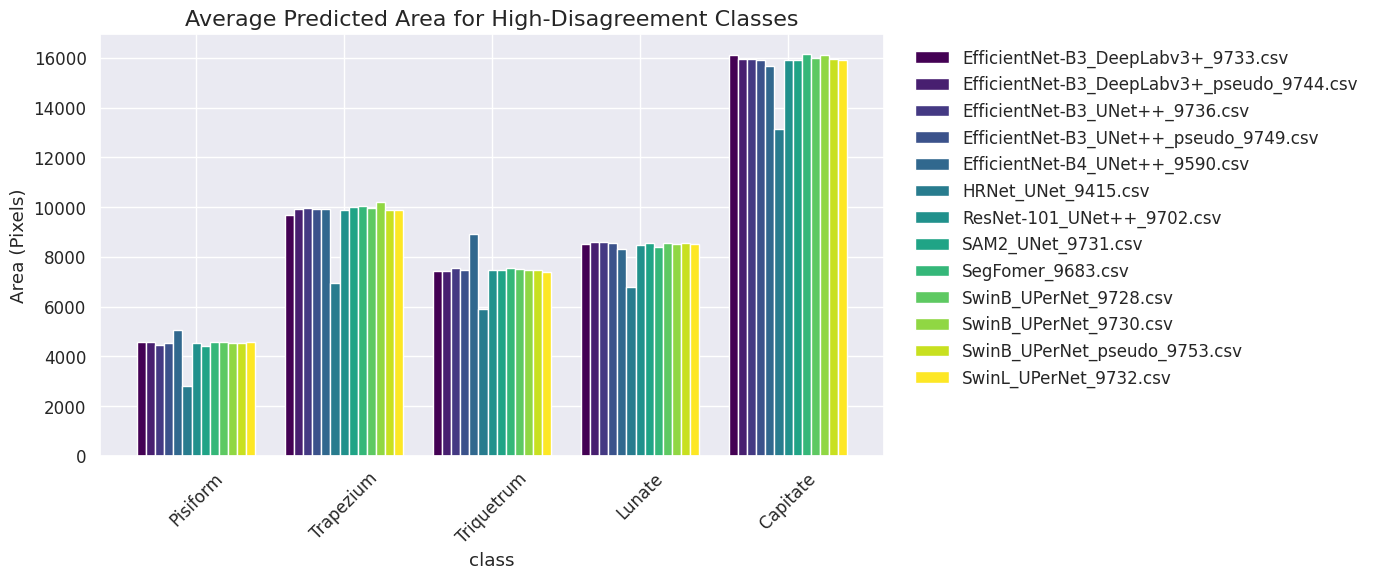

In [4]:
# =========================
# 3. 클래스별 불일치 분석 (Class Disagreement)
# =========================
# 클래스별 평균 면적 계산
class_area_means = {}
for name, df in dataframes.items():
    class_area_means[name] = df.groupby('class')['area'].mean()

class_area_df = pd.DataFrame(class_area_means)

# 표준편차(std_dev)와 평균(mean) 계산
class_area_df['std_dev'] = class_area_df.std(axis=1)
class_area_df['mean_area'] = class_area_df.mean(axis=1)

# 변동 계수(CV) = 표준편차 / 평균 (크기가 다른 뼈들을 공정하게 비교하기 위함)
class_area_df['cov'] = class_area_df['std_dev'] / class_area_df['mean_area']

# 결과 출력
print("=== 의견 차이가 가장 큰 뼈 클래스 Top 10 (CV 기준) ===")
display(class_area_df.sort_values('cov', ascending=False)[['std_dev', 'mean_area', 'cov']].head(10))

# 시각화 (Top 5)
top_diff_classes = class_area_df.sort_values('cov', ascending=False).index[:5]
subset_df = class_area_df.loc[top_diff_classes].drop(['std_dev', 'mean_area', 'cov'], axis=1)

plt.figure(figsize=(14, 6))
subset_df.plot(kind='bar', width=0.8, figsize=(14, 6), colormap='viridis')
plt.title('Average Predicted Area for High-Disagreement Classes', fontsize=16)
plt.ylabel('Area (Pixels)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

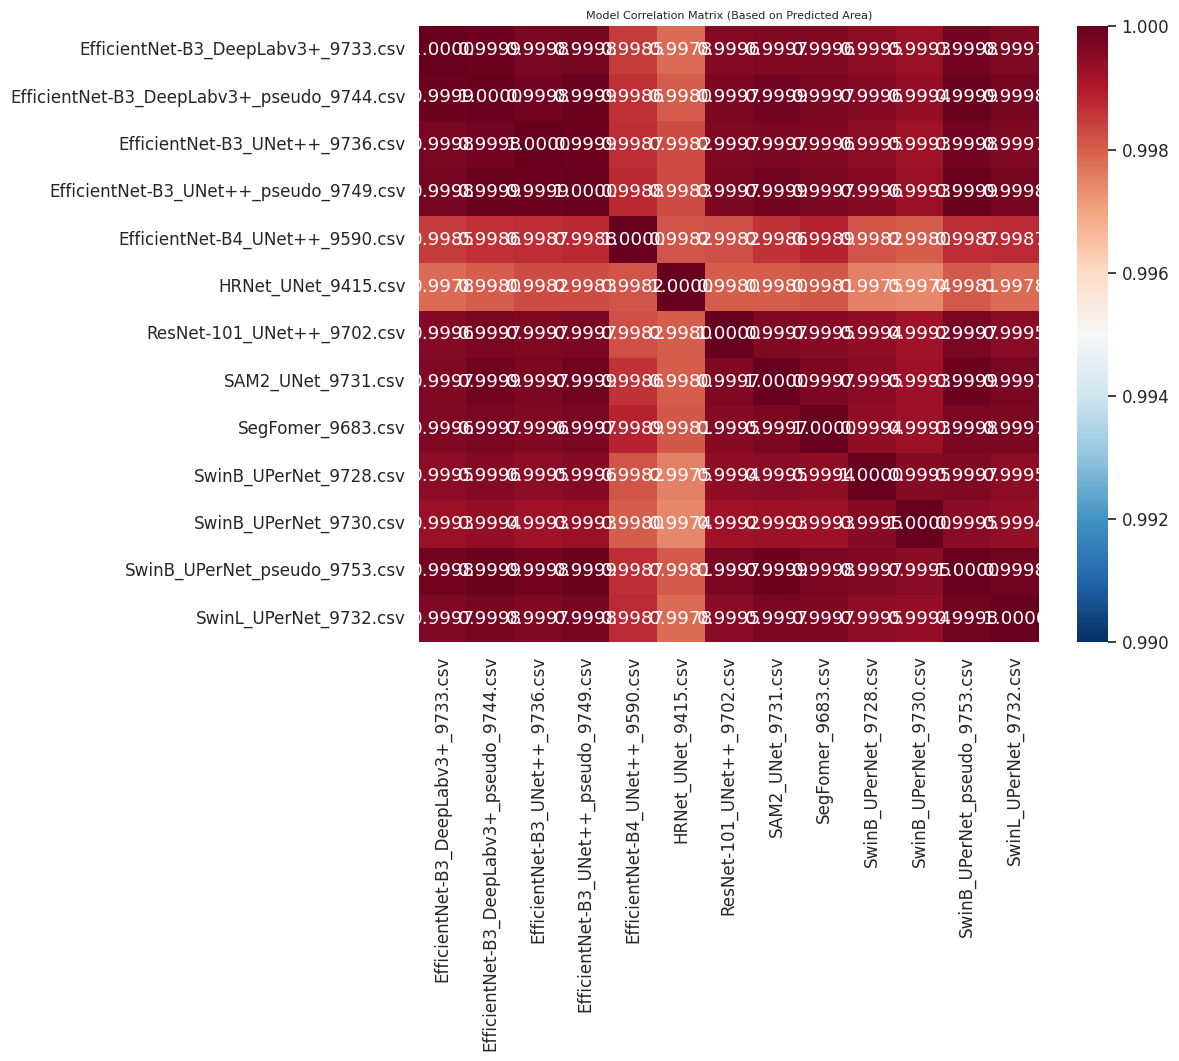

In [5]:
# =========================
# 4. 모델 간 유사도 분석 (Correlation Matrix)
# =========================
# 이미지별 총 예측 면적을 기준으로 데이터프레임 재구성
image_area_df = pd.DataFrame()
for name, df in dataframes.items():
    image_area_df[name] = df.groupby('image_name')['area'].sum()

# 상관관계 계산
corr_matrix = image_area_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".4f", vmin=0.99, vmax=1.0)
plt.title('Model Correlation Matrix (Based on Predicted Area)', fontsize=8)
plt.show()

In [6]:
# =========================
# 5. Hard Sample 찾기
# =========================
# 이미지별 모델 간 예측 면적의 표준편차 계산
image_area_df['std_dev'] = image_area_df.std(axis=1)

print("=== 모델 간 예측 편차가 가장 큰 이미지 Top 10 (Hard Samples) ===")
# 편차가 큰 순서대로 정렬
hard_samples = image_area_df.sort_values('std_dev', ascending=False)['std_dev'].head(10)
print(hard_samples)

# (선택 사항) 나중에 이미지를 시각화할 때 이 리스트를 활용하세요.
hard_sample_ids = hard_samples.index.tolist()
print("\n[Tip] 다음 이미지들을 시각화해서 정답(GT)과 비교해보세요:", hard_sample_ids)

=== 모델 간 예측 편차가 가장 큰 이미지 Top 10 (Hard Samples) ===
image_name
image1663637316403.png    11429.154324
image1663120192350.png     9999.404045
image1663637344279.png     9894.140125
image1663033766028.png     9661.668913
image1663724812856.png     9347.770795
image1663725110622.png     9047.292253
image1663724840375.png     9010.394980
image1663724624752.png     8737.992846
image1663117976084.png     8735.974010
image1663032434284.png     8677.398044
Name: std_dev, dtype: float64

[Tip] 다음 이미지들을 시각화해서 정답(GT)과 비교해보세요: ['image1663637316403.png', 'image1663120192350.png', 'image1663637344279.png', 'image1663033766028.png', 'image1663724812856.png', 'image1663725110622.png', 'image1663724840375.png', 'image1663724624752.png', 'image1663117976084.png', 'image1663032434284.png']


## 6. (추가) Baseline 방식 Dice로 모델별 클래스 성능 분석

- baseline_code.ipynb의 `dice_coef`(eps=1e-4)와 동일한 방식으로 계산
- **Validation GT가 있는 경우**(train의 json 라벨) 각 모델 CSV(pred rle)와 GT를 매칭해서 클래스별 Dice를 계산합니다.

> ⚠️ 이 섹션은 `IMAGE_ROOT`, `LABEL_ROOT` 경로가 실제 데이터 경로와 맞아야 동작합니다.

모델 간 Dice/IoU 계산 코드 (클래스별 / 전체)

In [7]:
# =========================
# 5) Dice로 모델별 클래스 성능 분석
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# =========================
# 1) RLE interval 유틸
# =========================
def rle_to_intervals(rle: str):
    if rle is None:
        return None, None
    if isinstance(rle, float) and np.isnan(rle):
        return None, None

    rle = str(rle).strip()
    if rle == "" or rle == "-1":
        return None, None

    s = rle.split()
    starts = np.asarray(s[0::2], dtype=np.int64) - 1
    lengths = np.asarray(s[1::2], dtype=np.int64)
    ends = starts + lengths
    return starts, ends

def interval_sum(starts, ends) -> int:
    if starts is None:
        return 0
    return int(np.sum(ends - starts))

def interval_intersection_len(a_starts, a_ends, b_starts, b_ends) -> int:
    if a_starts is None or b_starts is None:
        return 0

    i = j = 0
    inter = 0
    while i < len(a_starts) and j < len(b_starts):
        lo = max(a_starts[i], b_starts[j])
        hi = min(a_ends[i], b_ends[j])
        if lo < hi:
            inter += (hi - lo)
        if a_ends[i] <= b_ends[j]:
            i += 1
        else:
            j += 1
    return int(inter)

def dice_from_rle(rle_a: str, rle_b: str, eps: float = 1e-6):
    a_s, a_e = rle_to_intervals(rle_a)
    b_s, b_e = rle_to_intervals(rle_b)
    area_a = interval_sum(a_s, a_e)
    area_b = interval_sum(b_s, b_e)
    inter = interval_intersection_len(a_s, a_e, b_s, b_e)

    # 둘 다 빈 마스크면 1.0이지만, 아래에서 exclude 옵션으로 평균에서 제외 가능
    return (2.0 * inter + eps) / (area_a + area_b + eps), area_a, area_b

def iou_from_rle(rle_a: str, rle_b: str, eps: float = 1e-6):
    a_s, a_e = rle_to_intervals(rle_a)
    b_s, b_e = rle_to_intervals(rle_b)
    area_a = interval_sum(a_s, a_e)
    area_b = interval_sum(b_s, b_e)
    inter = interval_intersection_len(a_s, a_e, b_s, b_e)
    union = area_a + area_b - inter

    return (inter + eps) / (union + eps), area_a, area_b

# =========================
# 2) prediction DF -> pivot(stem x class -> rle)
# =========================
def norm_stem_keep_subdir(x: str) -> str:
    x = str(x).strip().replace("\\", "/")
    x = x.split("?")[0]
    if "/DCM/" in x:
        x = x.split("/DCM/")[-1]
    # 확장자 제거
    x = x.rsplit(".", 1)[0] if "." in x else x
    return x

def make_pred_table(df_pred: pd.DataFrame) -> pd.DataFrame:
    cols = {c.lower(): c for c in df_pred.columns}
    image_col = cols.get("image_name") or cols.get("image") or "image_name"
    class_col = cols.get("class") or "class"
    rle_col   = cols.get("rle") or cols.get("mask_rle") or "rle"

    tmp = df_pred[[image_col, class_col, rle_col]].copy()
    tmp.columns = ["image_name", "class", "rle"]
    tmp["stem"] = tmp["image_name"].astype(str).apply(norm_stem_keep_subdir)

    pivot = tmp.pivot_table(index="stem", columns="class", values="rle", aggfunc="first")
    return pivot

# =========================
# 3) 모델 간 similarity 계산
# =========================
def compute_pairwise_similarity(dataframes: dict, classes: list, eps=1e-6, exclude_both_empty=True):
    model_names = list(dataframes.keys())
    pivots = {m: make_pred_table(df) for m, df in dataframes.items()}

    # 공통 이미지(stem) 교집합(모든 모델에 존재하는 이미지들)
    common_stems = None
    for m in model_names:
        idx = set(pivots[m].index)
        common_stems = idx if common_stems is None else (common_stems & idx)
    common_stems = sorted(common_stems) if common_stems is not None else []
    print("common stems:", len(common_stems))

    # overall
    dice_mat = pd.DataFrame(np.nan, index=model_names, columns=model_names)
    iou_mat  = pd.DataFrame(np.nan, index=model_names, columns=model_names)

    # class-wise matrices
    dice_class = {c: pd.DataFrame(np.nan, index=model_names, columns=model_names) for c in classes}
    iou_class  = {c: pd.DataFrame(np.nan, index=model_names, columns=model_names) for c in classes}

    # diagonal
    for m in model_names:
        dice_mat.loc[m, m] = 1.0
        iou_mat.loc[m, m] = 1.0
        for c in classes:
            dice_class[c].loc[m, m] = 1.0
            iou_class[c].loc[m, m] = 1.0

    for m1, m2 in combinations(model_names, 2):
        p1, p2 = pivots[m1], pivots[m2]

        per_class_dice = []
        per_class_iou  = []

        for c in classes:
            if c not in p1.columns or c not in p2.columns:
                continue

            vals_dice = []
            vals_iou  = []

            for stem in common_stems:
                rle_a = p1.loc[stem, c]
                rle_b = p2.loc[stem, c]

                d, area_a, area_b = dice_from_rle(rle_a, rle_b, eps=eps)
                j, area_a2, area_b2 = iou_from_rle(rle_a, rle_b, eps=eps)

                if exclude_both_empty and (area_a == 0 and area_b == 0):
                    continue

                vals_dice.append(d)
                vals_iou.append(j)

            dc = float(np.mean(vals_dice)) if len(vals_dice) > 0 else np.nan
            ic = float(np.mean(vals_iou))  if len(vals_iou)  > 0 else np.nan

            dice_class[c].loc[m1, m2] = dc
            dice_class[c].loc[m2, m1] = dc
            iou_class[c].loc[m1, m2]  = ic
            iou_class[c].loc[m2, m1]  = ic

            if not np.isnan(dc): per_class_dice.append(dc)
            if not np.isnan(ic): per_class_iou.append(ic)

        dice_overall = float(np.mean(per_class_dice)) if len(per_class_dice) > 0 else np.nan
        iou_overall  = float(np.mean(per_class_iou))  if len(per_class_iou)  > 0 else np.nan

        dice_mat.loc[m1, m2] = dice_overall
        dice_mat.loc[m2, m1] = dice_overall
        iou_mat.loc[m1, m2]  = iou_overall
        iou_mat.loc[m2, m1]  = iou_overall

        print(f"[{m1}] vs [{m2}] overall dice={dice_overall:.4f}, iou={iou_overall:.4f}")

    return dice_mat, iou_mat, dice_class, iou_class, common_stems


# =========================
# 5) 실행 + 요청한 10개 클래스 Dice 히트맵
# =========================

CLASSES = [
    'finger-1','finger-2','finger-3','finger-4','finger-5',
    'finger-6','finger-7','finger-8','finger-9','finger-10',
    'finger-11','finger-12','finger-13','finger-14','finger-15',
    'finger-16','finger-17','finger-18','finger-19',
    'Trapezium','Trapezoid','Capitate','Hamate','Scaphoid','Lunate',
    'Triquetrum','Pisiform','Radius','Ulna'
]

# 전체 계산(클래스별/전체)
dice_mat, iou_mat, dice_class, iou_class, common_stems = compute_pairwise_similarity(
    dataframes=dataframes,
    classes=CLASSES,
    exclude_both_empty=True
)

# 전체(클래스 평균) 히트맵도 같이 보기
# plot_heatmap(dice_mat, "Overall Model Similarity (Dice, class-mean)", vmin=0.0, vmax=1.0, annotate=False)
# plot_heatmap(iou_mat,  "Overall Model Similarity (IoU, class-mean)",  vmin=0.0, vmax=1.0, annotate=False)


common stems: 288


[EfficientNet-B3_DeepLabv3+_9733.csv] vs [EfficientNet-B3_DeepLabv3+_pseudo_9744.csv] overall dice=0.9940, iou=0.9881
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [EfficientNet-B3_UNet++_9736.csv] overall dice=0.9867, iou=0.9740
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [EfficientNet-B3_UNet++_pseudo_9749.csv] overall dice=0.9889, iou=0.9783
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [EfficientNet-B4_UNet++_9590.csv] overall dice=0.9689, iou=0.9432
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [HRNet_UNet_9415.csv] overall dice=0.9508, iou=0.9172
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [ResNet-101_UNet++_9702.csv] overall dice=0.9795, iou=0.9602
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [SAM2_UNet_9731.csv] overall dice=0.9851, iou=0.9711
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [SegFomer_9683.csv] overall dice=0.9785, iou=0.9582
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [SwinB_UPerNet_9728.csv] overall dice=0.9845, iou=0.9698
[EfficientNet-B3_DeepLabv3+_9733.csv] vs [SwinB_UPerNet_9730.csv] overal

In [8]:
# =========================
# 6) 모델간 클래스별 Dice (top 10)
# =========================
import pandas as pd
from itertools import combinations

TARGET_CLASSES = [
    "Pisiform", "Trapezium", "Triquetrum", "Lunate", "Capitate",
    "Trapezoid", "Scaphoid", "Hamate", "finger-7", "finger-15"
]

rows = []

model_names = list(dice_class[TARGET_CLASSES[0]].index)

for m1, m2 in combinations(model_names, 2):
    row = {
        "model_A": m1,
        "model_B": m2,
    }

    for c in TARGET_CLASSES:
        val = dice_class[c].loc[m1, m2]
        row[c] = round(float(val), 4) if pd.notna(val) else None

    # (선택) 클래스 평균도 같이
    row["mean_target_dice"] = round(
        pd.Series([row[c] for c in TARGET_CLASSES if row[c] is not None]).mean(),
        4
    )

    rows.append(row)

df_target_dice = pd.DataFrame(rows)

display(df_target_dice)



,model_A,model_B,Pisiform,Trapezium,Triquetrum,Lunate,Capitate,Trapezoid,Scaphoid,Hamate,finger-7,finger-15,mean_target_dice
0,EfficientNet-B3_DeepLabv3+_9733.csv,EfficientNet-B3_DeepLabv3+_pseudo_9744.csv,0.9808,0.9835,0.9904,0.9901,0.9921,0.9771,0.9934,0.9882,0.9971,0.9963,0.9889
1,EfficientNet-B3_DeepLabv3+_9733.csv,EfficientNet-B3_UNet++_9736.csv,0.9609,0.9734,0.9791,0.9797,0.9818,0.9608,0.9851,0.9722,0.9924,0.9871,0.9772
2,EfficientNet-B3_DeepLabv3+_9733.csv,EfficientNet-B3_UNet++_pseudo_9749.csv,0.9690,0.9781,0.9844,0.9833,0.9851,0.9696,0.9879,0.9801,0.9939,0.9892,0.9821
3,EfficientNet-B3_DeepLabv3+_9733.csv,EfficientNet-B4_UNet++_9590.csv,0.9197,0.9670,0.9045,0.9530,0.9338,0.9466,0.9572,0.9550,0.9787,0.9821,0.9498
4,EfficientNet-B3_DeepLabv3+_9733.csv,HRNet_UNet_9415.csv,0.6686,0.8228,0.8486,0.8697,0.8873,0.9179,0.9387,0.9507,0.9780,0.9686,0.8851
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,SwinB_UPerNet_9728.csv,SwinB_UPerNet_pseudo_9753.csv,0.9659,0.9816,0.9822,0.9829,0.9860,0.9685,0.9882,0.9796,0.9944,0.9933,0.9823
74,SwinB_UPerNet_9728.csv,SwinL_UPerNet_9732.csv,0.9543,0.9766,0.9760,0.9787,0.9830,0.9582,0.9845,0.9747,0.9910,0.9891,0.9766
75,SwinB_UPerNet_9730.csv,SwinB_UPerNet_pseudo_9753.csv,0.9689,0.9776,0.9850,0.9840,0.9860,0.9709,0.9882,0.9810,0.9957,0.9933,0.9831
76,SwinB_UPerNet_9730.csv,SwinL_UPerNet_9732.csv,0.9567,0.9709,0.9781,0.9790,0.9814,0.9618,0.9834,0.9748,0.9912,0.9879,0.9765


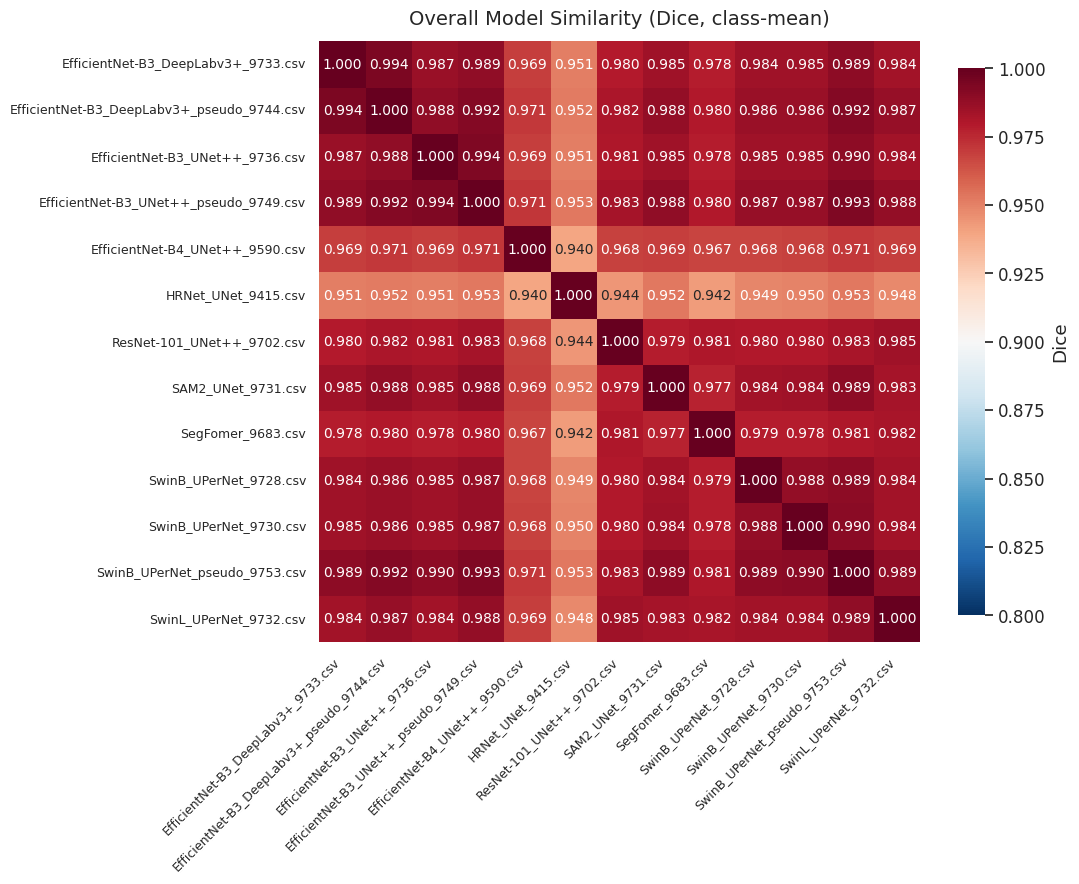

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap_seaborn(
    df,
    title,
    vmin=0.8,
    vmax=1.0,
    figsize=(11, 9)
):
    plt.figure(figsize=figsize)

    ax = sns.heatmap(
    df.astype(float),
    cmap="RdBu_r",   # ✅ 파랑-흰-빨강 (첨부 이미지 느낌)
    vmin=vmin,
    vmax=vmax,
    annot=True,
    fmt=".3f",
    annot_kws={"size": 10},
    square=True,
    linewidths=0,
    cbar_kws={"label": "Dice", "shrink": 0.9}
)

    ax.set_title(title, fontsize=14, pad=12)

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right",
        fontsize=9
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
        fontsize=9
    )

    plt.tight_layout()
    plt.show()
    
plot_heatmap_seaborn(
    dice_mat,
    "Overall Model Similarity (Dice, class-mean)",
    vmin=0.8,
    vmax=1.0
)



In [10]:
# =========================
# 8) 각 클래스별 Dice 상위 모델 확인
# =========================

# ex)“Pisiform에서 가장 다른 모델쌍 Top-5”
display(df_target_dice.sort_values("Pisiform").head(5))
# display(df_target_dice.sort_values("Trapezoid").head(5))
# display(df_target_dice.sort_values("Trapezium").head(5))
# display(df_target_dice.sort_values("Triquetrum").head(5))
# display(df_target_dice.sort_values("Lunate").head(5))
# display(df_target_dice.sort_values("Capitate").head(5))


,model_A,model_B,Pisiform,Trapezium,Triquetrum,Lunate,Capitate,Trapezoid,Scaphoid,Hamate,finger-7,finger-15,mean_target_dice
42,EfficientNet-B4_UNet++_9590.csv,HRNet_UNet_9415.csv,0.6343,0.8132,0.7767,0.8554,0.8913,0.9087,0.9317,0.9409,0.9822,0.9680,0.8702
52,HRNet_UNet_9415.csv,SegFomer_9683.csv,0.6650,0.8025,0.8300,0.8672,0.8826,0.9231,0.9296,0.9423,0.9715,0.9632,0.8777
50,HRNet_UNet_9415.csv,ResNet-101_UNet++_9702.csv,0.6666,0.8088,0.8360,0.8651,0.8865,0.9176,0.9317,0.9460,0.9709,0.9603,0.8790
54,HRNet_UNet_9415.csv,SwinB_UPerNet_9730.csv,0.6669,0.8024,0.8459,0.8721,0.8877,0.9296,0.9358,0.9455,0.9776,0.9662,0.8830
4,EfficientNet-B3_DeepLabv3+_9733.csv,HRNet_UNet_9415.csv,0.6686,0.8228,0.8486,0.8697,0.8873,0.9179,0.9387,0.9507,0.9780,0.9686,0.8851
